## Exploring Climbing Through Statistical Data
**By:** Jenny Howard


**data:** https://www.kaggle.com/dcohen21/8anu-climbing-logbook/data


**source:** http://www.8a.nu


**keywords:** 
   
* **bouldering/boulder grades:** a type of climbing, graded on a V-scale (VB-V15)
    
* **routes:** in this set, 'routes' refers to either sport or trad climbing 
    
* **sport climbing:** a type of rope climbing that involves already-placed protection, which a climber will clip in to
    
* **trad climbing:** a type of rope climbing that requires climbers to place their own protection that they will clip in to
           

This dataset gives a climbing log from users across the world. It includes information about ascents; grades for both bouldering, sport, and trad climbing; as well as user commentary, methods of climbing (onsight, redpoint, etc.), and general demographics of users.
	This logbook gives climbers the ability to note grade levels of specific climbs, track useful commentary from previous ascentionists, and furthermore (with some analysis) note how they’re tracking compared to others. 
	The data is from 8a.nu, one of the world’s largest climbing logs. 


## Data Analysis

**Which countries have the highest number of climbers?** 

**Spain**, **Germany**, and **Sweden** are the top three countries by number of climbers on 8a.nu

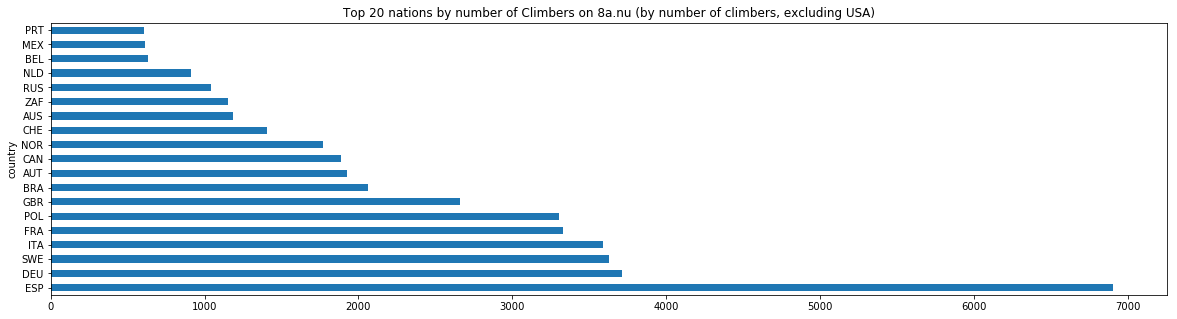

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(20.0, 10.0)


user = pd.read_csv("/Users/Jenny/Documents/Thinkful/climbing data/climbing_user.csv", low_memory=False).rename(columns = {'id':'user_id'})
ascent = pd.read_csv("/Users/Jenny/Documents/Thinkful/climbing data/climbing_ascent.csv", low_memory=False).rename(columns = {'id':'ascent_id'})
grade = pd.read_csv("/Users/Jenny/Documents/Thinkful/climbing data/climbing_grade.csv", low_memory=False).rename(columns = {'id':'grade_id'})

ascent_user = pd.merge(ascent, user, how='inner')

top_20 = user.groupby('country').size().sort_values(ascending = False).head(20)[1:21]
plt.figure(figsize = (20,5))
plt.title('Top 20 nations by number of Climbers on 8a.nu (by number of climbers, excluding USA)')
top_20.plot(kind = 'barh')
plt.show()

**How do the scores of men and women compare?** 

I compare the number of **men versus women** on 8a, and then take a look at their respective scores. What's interesting to note is that although there are so few women compared to men, **their scores are about as comparable.** It can be gleaned that **women on 8a**, as a whole, have a **lower standard deviation** of scores. 

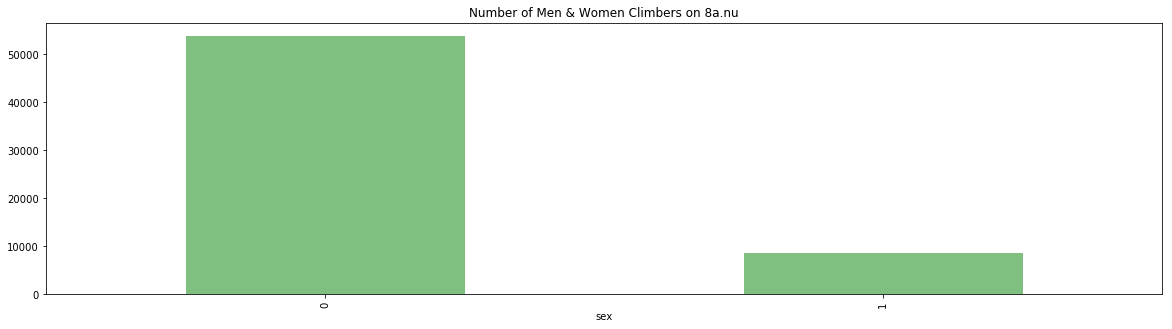

In [2]:
user['sex'] = user['sex'].astype(int)
user = user[user.sex <= 1]

sex = user.groupby('sex').size().sort_values(ascending = False).head(20)
plt.figure(figsize = (20,5))
plt.title('Number of Men & Women Climbers on 8a.nu')
plt.xlim(-1, 0)
sex.plot(kind = 'bar', color = 'green', alpha = 0.5)
plt.show()

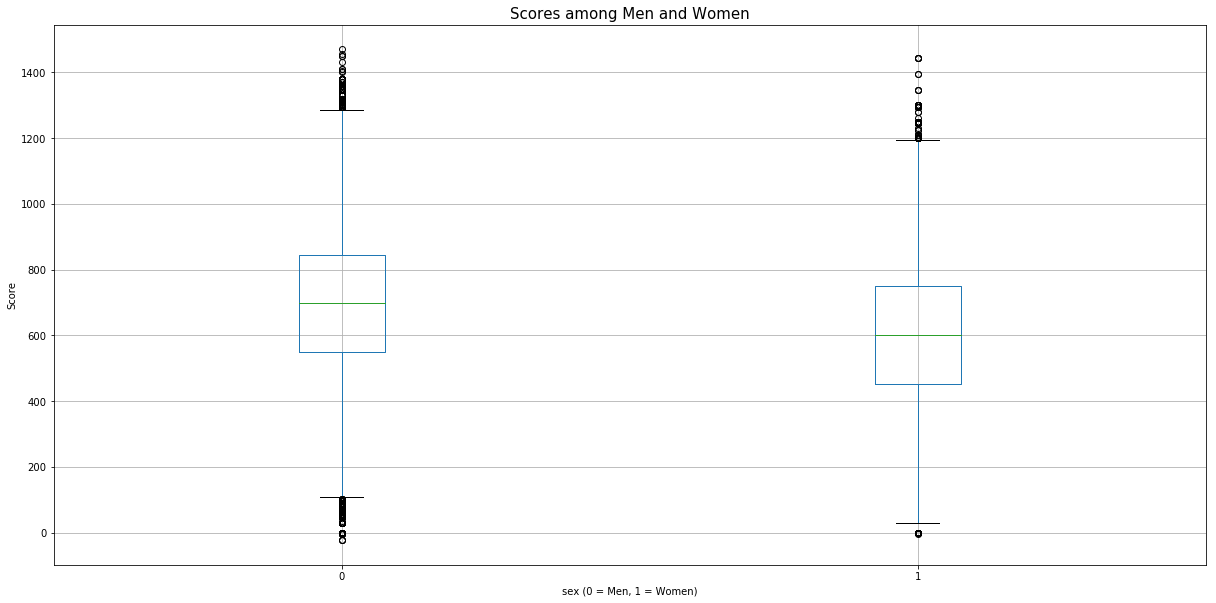

In [3]:
score_sex_boxplot = ascent_user.boxplot(column = 'total_score', by = 'sex')
plt.title("Scores among Men and Women", fontsize = 15)
plt.suptitle("")
score_sex_boxplot.set_xlabel('sex (0 = Men, 1 = Women)')
score_sex_boxplot.set_ylabel('Score')
plt.show()

**What is the height and weight distribution of climbers on 8a?**

There is greater variance of height among the lower-weight climbers, ranging from about 160cm to 180cm. The heavier-weight climbers' height is centralized around 180cm. When looking at total score by weight, **weight does not seem to have any significant effect on a climber's score.** 

In [4]:
#print(grade.columns)
#print(user.columns)
#grade.head()

In [5]:
#user.describe()
#height = user[['height']]

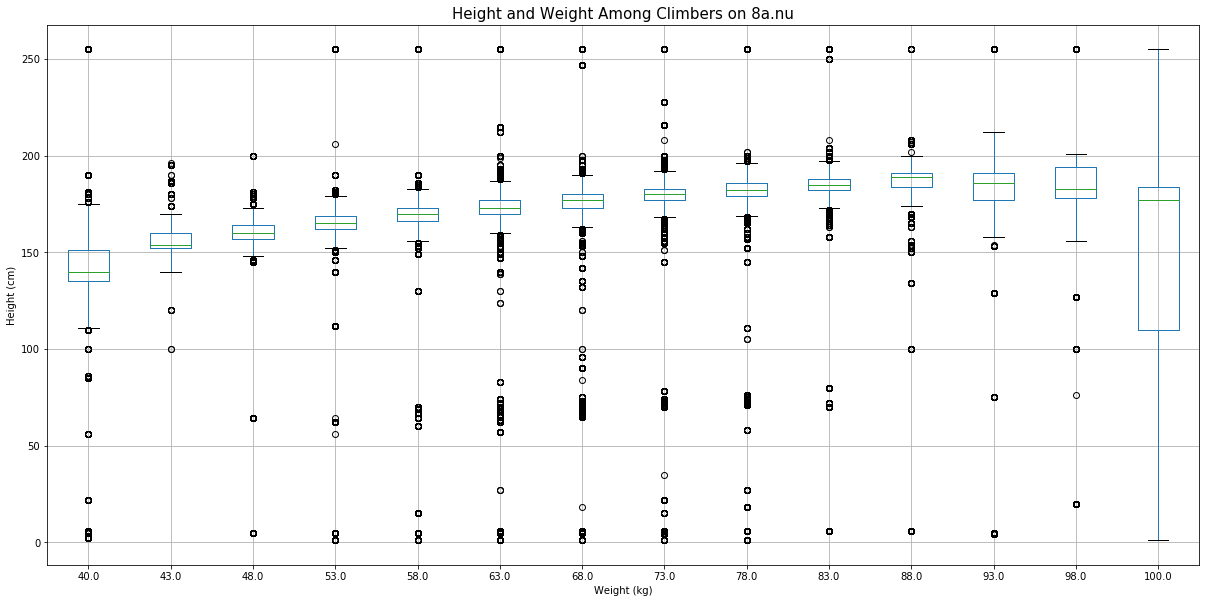

In [6]:
user = ascent_user.dropna(subset=['height', 'weight'])

user['height'] = pd.DataFrame(np.where(user.height == 0, None, user.height))
user['weight'] = pd.DataFrame(np.where(user.weight == 0, None, user.weight))

user['height'] = user.height.astype(np.float)
user['weight'] = user.weight.astype(np.float)

user_weight_height_plot = user.boxplot(column = 'height', by = 'weight')
plt.title("Height and Weight Among Climbers on 8a.nu", fontsize = 15)
plt.suptitle("")
user_weight_height_plot.set_xlabel('Weight (kg)')
user_weight_height_plot.set_ylabel('Height (cm)')
#plt.ylim(135, 265)
#plt.xlim(2.5, 15.5)
plt.show()

In [7]:
#ascent_user.describe()

In [8]:
ascent_user['top_75_percent_score'] = np.where(ascent_user['total_score']>= 845, 1, 0)

ascent_user['weight_dist'] = np.where(ascent_user.weight >= 68, 1, 0)
ascent_user['height_dist'] = np.where(ascent_user.height >= 180, 1, 0)

#user['above_avg_height'] = np.where(user.height_dist == 1)
#user['below_avg_height'] = np.where(user.height_dist == 0)

# How large is each group?
print('lower weight sample size:', len(ascent_user[ascent_user.weight_dist == 1]))
print('higher weight sample size:', len(ascent_user[ascent_user.weight_dist == 0]))
print('higher weight proportion:', ascent_user.weight_dist.mean())
print()

print('lower height sample size:', len(ascent_user[ascent_user.height_dist == 1]))
print('higher height sample size:', len(ascent_user[ascent_user.height_dist == 0]))
print('higher height proportion:', ascent_user.height_dist.mean())
print()

# What is the above average height rate of lower weight and higher weight?
print('above avg height rate:', ascent_user[ascent_user.height_dist == 1].top_75_percent_score.mean())
print('below avg height rate:', ascent_user[ascent_user.height_dist == 0].top_75_percent_score.mean())


print('above avg weight rate:', ascent_user[ascent_user.weight_dist == 1].top_75_percent_score.mean())
print('below avg weight rate:', ascent_user[ascent_user.weight_dist == 0].top_75_percent_score.mean())


lower weight sample size: 1304009
higher weight sample size: 1373003
higher weight proportion: 0.48711361772005507

lower height sample size: 745293
higher height sample size: 1931719
higher height proportion: 0.27840480356457126

above avg height rate: 0.23429845711686545
below avg height rate: 0.26743278913755053
above avg weight rate: 0.23862028559618836
below avg weight rate: 0.2768114854810951


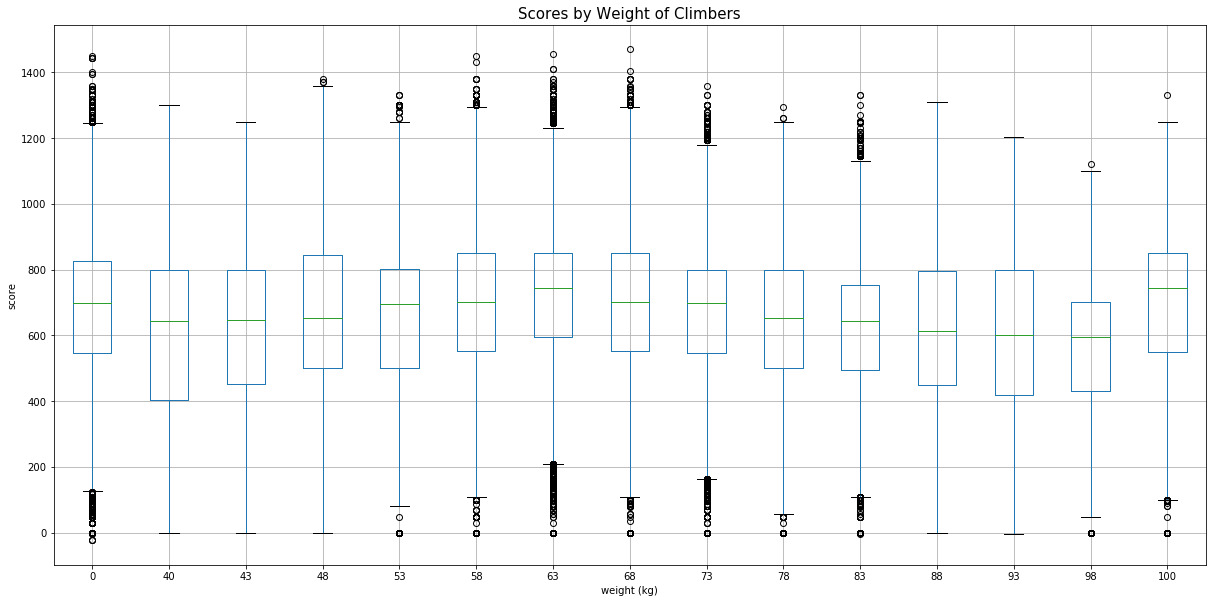

In [9]:
score_weight_boxplot = ascent_user.boxplot(column = 'total_score', by = 'weight')
plt.title("Scores by Weight of Climbers", fontsize = 15)
plt.suptitle("")
score_weight_boxplot.set_xlabel('weight (kg)')
score_weight_boxplot.set_ylabel('score')
plt.show()

In [10]:
# Are the lower weight and higher weight groups significantly different?
import scipy.stats as stats
stats.ttest_ind(ascent_user[ascent_user.weight_dist == 1].top_75_percent_score,
               ascent_user[ascent_user.weight_dist == 0].top_75_percent_score)

Ttest_indResult(statistic=-71.433445778556319, pvalue=0.0)

**Further Research**

For further research, I'd like to look into the following: 
What is the average time it takes for women to jump from one bouldering grade to the next?

To answer this question, I’d want to create a table with rows labeled with user ids, and the columns as grades in ascending order from VB to V15. I’d want to generate a list then of, not just grades, but grade progression (for instance, V5 - V6, V6 - V7, and so forth). To get the progression time, I’d create a function that takes in 3 variables -- the data set, grade 1, and grade 2. The function would calculate the difference in time between grade 1 and grade 2. After iterating this for all women climbers, I could generate the average amount of time take to grade jump. I could graph this as a scatter plot. A violin plot might also be interesting to look at. 
	Outside the scope of this dataset, it would probably be more useful to look at data from Mountain Project, as I understand it is updated on a more regular basis, and is far more modern than 8a.nu. 